## Missing Values
Missing values occurs in dataset when some of the informations is not stored for a variable
There are 3 mechanisms

### 1 Missing Completely at Random, MCAR:
Missing completely at random (MCAR) is a type of missing data mechanism in which the probability of a value being missing is unrelated to both the observed data and the missing data. In other words, if the data is MCAR, the missing values are randomly distributed throughout the dataset, and there is no systematic reason for why they are missing.

For example, in a survey about the prevalence of a certain disease, the missing data might be MCAR if the survey participants with missing values for certain questions were selected randomly and their missing responses are not related to their disease status or any other variables measured in the survey.


### 2. Missing at Random MAR:
Missing at Random (MAR) is a type of missing data mechanism in which the probability of a value being missing depends only on the observed data, but not on the missing data itself. In other words, if the data is MAR, the missing values are systematically related to the observed data, but not to the missing data.
Here are a few examples of missing at random:

Income data: Suppose you are collecting income data from a group of people, but some participants choose not to report their income. If the decision to report or not report income is related to the participant's age or gender, but not to their income level, then the data is missing at random.

Medical data: Suppose you are collecting medical data on patients, including their blood pressure, but some patients do not report their blood pressure. If the patients who do not report their blood pressure are more likely to be younger or have healthier lifestyles, but the missingness is not related to their actual blood pressure values, then the data is missing at random.

## 3. Missing data not at random (MNAR) 
It is a type of missing data mechanism where the probability of missing values depends on the value of the missing data itself. In other words, if the data is MNAR, the missingness is not random and is dependent on unobserved or unmeasured factors that are associated with the missing values.

For example, suppose you are collecting data on the income and job satisfaction of employees in a company. If employees who are less satisfied with their jobs are more likely to refuse to report their income, then the data is not missing at random. In this case, the missingness is dependent on job satisfaction, which is not directly observed or measured.

## Examples

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.shape

(891, 15)

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### 🤔 To handle the missing value just delete the rows that contain missing value (data loss)

In [8]:
df.shape

(891, 15)

In [9]:
## delete row in which missing value contain
df.dropna().shape

(182, 15)

### 🤔 To handle the missing value just delete the column that contain missing value (data loss)

In [10]:
df.dropna(axis=1).shape       #### since there are 15 column and 4 columns are deleted. 

(891, 11)

## Imputation Missing Values
### 1- Mean Value Imputation

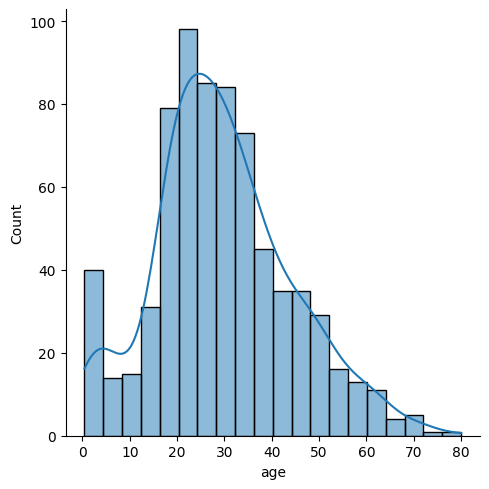

In [11]:
sns.displot(df["age"], kde=True)

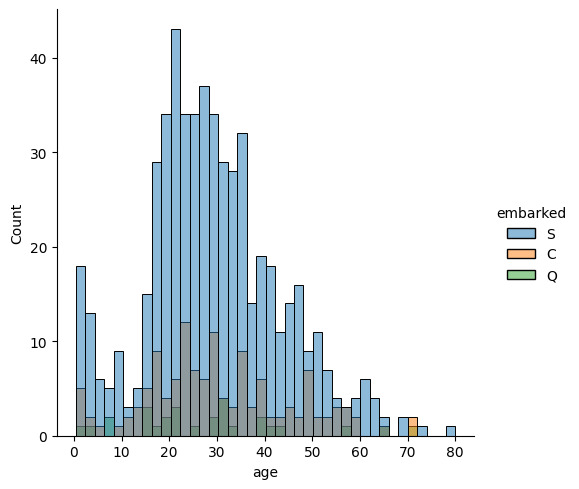

In [12]:
sns.displot(data=df, x='age', hue='embarked', kind='hist', bins=40)

<Axes: xlabel='age', ylabel='Count'>

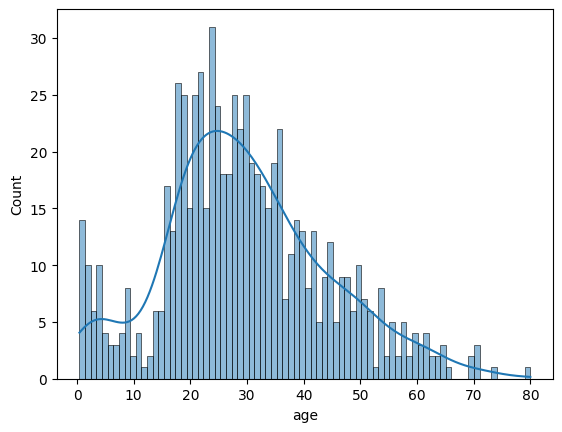

In [13]:
##sns.histplot(df["age"], kde=True)

sns.histplot(data=df, x="age", kde=True, bins=80)

In [14]:
## count number of people belongs to which port

df["embark_town"].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

<Axes: xlabel='embarked', ylabel='count'>

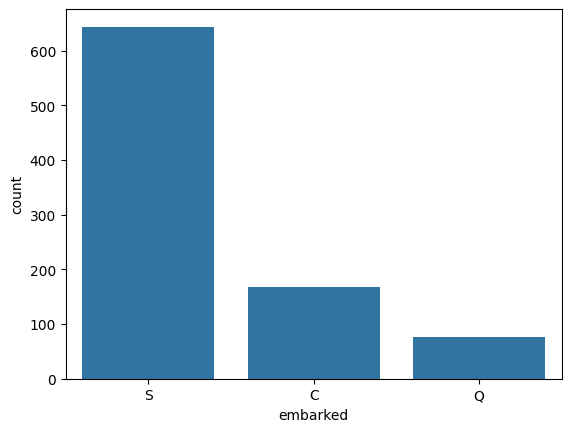

In [15]:
## using visualization
sns.countplot(data=df, x="embarked")

<Axes: xlabel='embarked', ylabel='count'>

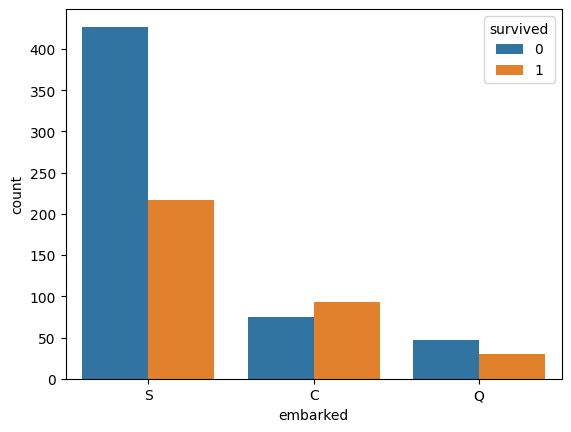

In [16]:
## analyse suvival people based on embarked
sns.countplot(data=df, x='embarked', hue='survived')

📊 Interpretation: above info tells 👆👆👆
### 1. Southampton (S):
* Most passengers boarded here.
* Survival rate is lower (more orange than red).

### 2. Cherbourg (C):

* Medium number of passengers.
* Higher survival rate (red bar is taller than orange).

### 3. Queenstown (Q):

* Few passengers.
* Survival rate is low (more orange).

In [17]:
### fill nan of age by mean value
df['age_mean'] = df['age'].fillna(df['age'].mean())

In [18]:
df[["age_mean", "age"]]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [19]:
df.shape

(891, 16)

### Note : mean imputation works well when we have normally distributed data

### 2. Median Value Imputation- If we have outliers in the dataset

In [20]:
df['age_median'] = df['age'].fillna(df['age'].median())

In [21]:
df[['age_median', 'age_mean', 'age']]

,age_median,age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


In [22]:
df.shape   

(891, 17)

### 3. Mode Imputation Technqiue--Categorical values

In [23]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [24]:
print(df['embarked'].isnull().sum())

2


In [25]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [26]:
df[df['embarked'].notna()]['embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 889, dtype: object

In [27]:
df[df['embarked'].notna()]['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [28]:
## mode of embarked

df['embarked_mode'] = df[df['embarked'].notna()]['embarked'].mode()[0]

In [29]:
### check is null or not
print(df['embarked_mode'].isnull().sum())

0
